In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import linprog
from scipy.stats import chi2
import random

In [2]:
#Q1.2

def solveOT(mu,nu,C):
    N = len(mu)
    A = np.zeros((2*N,N**2))
    for i in range(N):
        for j in range(i*N,(i+1)*N):
            A[i,j] = 1
    for i in range(N,2*N):
        for j in range(N):
            A[i,i-N+j*N] = 1
    b = np.hstack((mu,nu))
    gamma = linprog(C,A_eq=A,b_eq=b,bounds=(0,None), method = 'simplex')
    return gamma.x

<ipython-input-2-f105bf3d09c7>:13: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  gamma = linprog(C,A_eq=A,b_eq=b,bounds=(0,None), method = 'simplex')


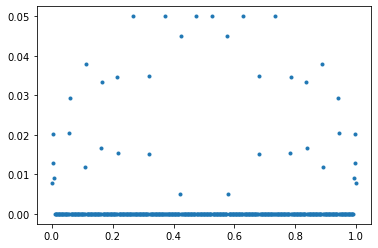

In [3]:
#Q1.3

N = 20
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
nu_1 = np.exp(-10*(y-0.5)**2)
nu = nu_1/sum(nu_1)
mu_1 = np.ones(N)
mu = mu_1/sum(mu_1)
c = np.zeros(N**2)
for i in range(N):
    for j in range(i*N,(i+1)*N):
        c[j] = (x[i]-y[j-i*N])**2
gamma = solveOT(mu,nu,c)
X = np.linspace(0,1,N**2)
plt.plot(X,gamma,'.')
#print(gamma)
#comme on a vu, le plupart des éléments de x sont 0, donc on peut dire elle est déterministe

In [4]:
#Q1.4

def solveOTdual(mu,nu,C):
    N = len(mu)
    c = np.hstack((mu,nu))
    A = np.zeros((2*N,N**2))
    for i in range(N):
        for j in range(i*N,(i+1)*N):
            A[i,j] = 1
    for i in range(N,2*N):
        for j in range(N):
            A[i,i-N+j*N] = 1
    A = A.T
    gamma = linprog(-c,A_ub=A, b_ub=C,bounds=(None,None), method = 'simplex')
    u,v = np.hsplit(gamma.x,2)
    return u,v,gamma.slack

<ipython-input-2-f105bf3d09c7>:13: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  gamma = linprog(C,A_eq=A,b_eq=b,bounds=(0,None), method = 'simplex')


3.034531090423147e-17


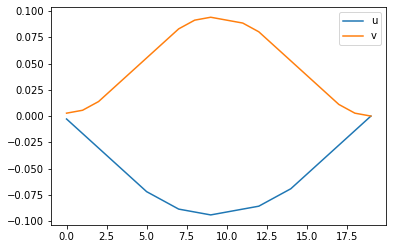

In [5]:
N = 20
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
nu_1 = np.exp(-10*(y-0.5)**2)
nu = nu_1/sum(nu_1)
mu_1 = np.ones(N)
mu = mu_1/sum(mu_1)
C = np.zeros(N**2)
for i in range(N):
    for j in range(i*N,(i+1)*N):
        C[j] = (x[i]-y[j-i*N])**2
u,v,s = solveOTdual(mu,nu,C)

x = solveOT(mu,nu,C)

plt.plot(u,label ='u')
plt.plot(v,label ='v')
plt.legend()

A = np.zeros(len(x))
for i in range (len(x)):
    A[i] = x[i]*s[i]
print(max(abs(A)))



<ipython-input-2-f105bf3d09c7>:13: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  gamma = linprog(C,A_eq=A,b_eq=b,bounds=(0,None), method = 'simplex')
<ipython-input-2-f105bf3d09c7>:13: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  gamma = linprog(C,A_eq=A,b_eq=b,bounds=(0,None), method = 'simplex')


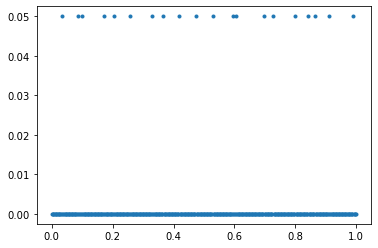

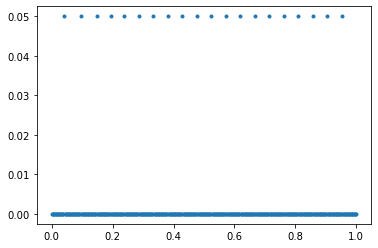

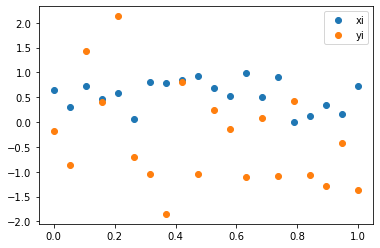

In [6]:
#Q1.5

N = 20
mu = np.ones(N)/N
nu = np.ones(N)/N
x1 = np.random.rand(N)
y1 = np.random.rand(N)
c = np.zeros(N**2)
for i in range(N):
    for j in range(i*N,(i+1)*N):
        c[j] = (x1[i]-y1[j-i*N])**2
gamma1 = solveOT(mu,nu,c)
X1 = np.linspace(0,1,N**2)
Y = np.zeros(N**2)
for i in range(N**2):
    if i%N == 0:
        Y[i] = 0.05
plt.plot(X1,gamma1,'.')

x2 = np.random.rand(N)
y2 = np.random.randn(N)
C = np.zeros(N**2)
for i in range(N):
    for j in range(i*N,(i+1)*N):
        C[j] = (x[i]-y[j-i*N])**2+(x[i]**2-y[j-i*N]**2)**2
gamma2 = solveOT(mu,nu,C)
plt.figure(2)
plt.plot(X1,gamma2,'.')
X2 = np.linspace(0,1,N)
plt.figure(3)
plt.plot(X2,x2,'o',label = 'xi')
plt.plot(X2,y2,'o',label = 'yi')
plt.legend()

In [7]:
# vérification de gamma^* est une matrice de permutation 
a1 = np.vstack(np.hsplit(gamma1,N))
ligne = []
colonne = []
for i in range(N):
    ligne.append(i+1)
    for j in range(N):
        if a1[i,j] != 0:
            colonne.append(j+1)
print(ligne)
print(colonne)
# pour chaque ligne,il n'exsite qu'un seul élément qui est différent que 0
# pour chaque colonne, il n'exsite qu'un seul élément qui est différent que 0

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[14, 15, 1, 9, 2, 4, 13, 7, 8, 10, 12, 18, 3, 19, 11, 20, 17, 6, 5, 16]


In [8]:
a2 = np.vstack(np.hsplit(gamma2,N))
ligne = []
colonne = []
for i in range(N):
    ligne.append(i+1)
    for j in range(N):
        if a2[i,j] != 0:
            colonne.append(j+1)
print(ligne)
print(colonne)
# Voici la position des éléments qui relie chaque point i au point j = σ(i).

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[17, 19, 20, 18, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


In [9]:
############################

In [16]:
#Q2.3

def GradDualReg(mu,nu,C,eps,t):
    it=0  #nb d'itération
    N = len(mu)
    u = np.zeros(N)
    grad = np.zeros(N)
    v = 0
    e = 0
    while it<=5000:
        for i in range(N):
            for j in range(N):
                for k in range(N):
                    e += np.exp(-C[k,j]/eps+u[k]/eps)
                v += np.exp(-C[i,j]/eps+u[i]/eps)/e*nu[j]
                e = 0
            grad[i] = v-mu[i]                                  #calcul du gradien
            v = 0
        d= -grad
        if np.linalg.norm(d)<=10e-6 :
            break
        u=u+t*d
        it+=1
        err = np.linalg.norm(d)
    v = np.zeros(N)
    T = np.zeros(N)
    for j in range(N):
        for i in range(N):
            T[i] = C[i,j]
        v[j] = min(T-u)
    return u,v

In [24]:
#Q2.4

N = 20
t = 0.1
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
nu_1 = np.exp(-10*(y-0.5)**2)
nu = nu_1/sum(nu_1)
mu_1 = np.ones(N)
mu = mu_1/sum(mu_1)
c = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        c[i,j] = (x[i]-y[j])**2
u1,v1 = GradDualReg(mu,nu,c,1,t)  #eps = 1
u2,v2 = GradDualReg(mu,nu,c,0.5,t) #eps = 0.5
u3,v3 = GradDualReg(mu,nu,c,0.1,t) #eps = 0.1
u4,v4 = GradDualReg(mu,nu,c,0.05,t) #eps = 0.05
u5,v5 = GradDualReg(mu,nu,c,0.01,t) #eps = 0.01
u6,v6 = GradDualReg(mu,nu,c,0.005,t) #eps = 0.005

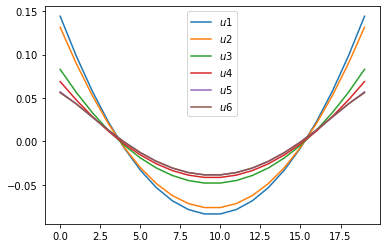

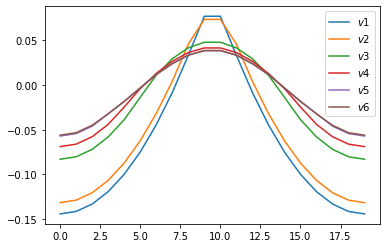

In [62]:
U = [u1,u2,u3,u4,u5,u6]
V = [v1,v2,v3,v4,v5,v6]
for i in range(len(U)):
    plt.plot(U[i],label = '$u{i}$'.format(i=i+1))
    plt.legend()
plt.figure(2)
for i in range(len(V)):
    plt.plot(V[i],label = '$v{i}$'.format(i=i+1))
    plt.legend()    

In [106]:
######################################

In [10]:
#Q3.3

def EntDual(mu,nu,C,eps,t):
    it1 = 0
    it2 = 0    #nb d'itération
    N = len(mu)
    grad1 = np.zeros(N)
    grad2 = np.zeros(N)
    u = np.zeros(N)
    v = np.zeros(N)
    m = 0
    n = 0
    while it1<10000:
        for i in range(N):
            for j in range(N):
                m += np.exp((u[i]+v[j]-C[i,j])/eps)
            grad1[i] = m-mu[i]
            m = 0
        d1 = -grad1
        if np.linalg.norm(d1)<=10e-6 :
            break
        u=u+t*d1
        it1 +=1
    while it2<10000:
        for j in range(N):
            for i in range(N):
                n += np.exp((u[i]+v[j]-C[i,j])/eps)
            grad2[j] = n-nu[j]
            n = 0
        d2 = -grad2
        if np.linalg.norm(d2)<=10e-6 :
            break
        v=v+t*d2
        it2 +=1
    a = np.exp(u/eps)
    b = np.exp(v/eps)
    gamma_bar = np.exp(-C/eps)
    gamma = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            gamma[i,j] = a[i]*b[j]*gamma_bar[i,j]
    return u,v,gamma

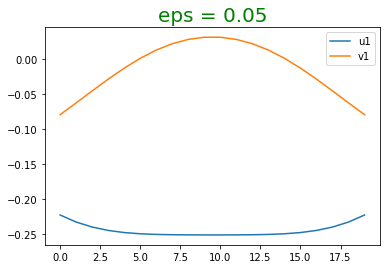

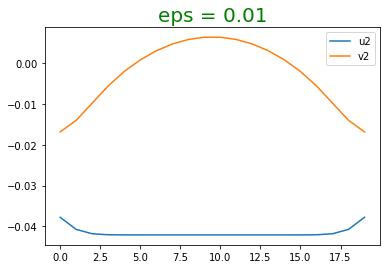

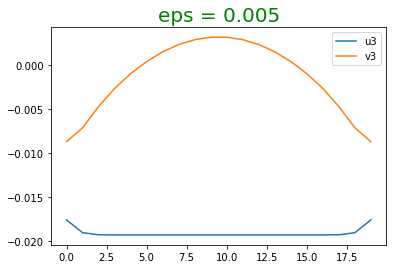

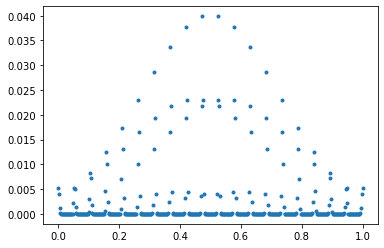

In [46]:
#Q3.4

N = 20
t = 0.1
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
nu_1 = np.exp(-10*(y-0.5)**2)
nu = nu_1/sum(nu_1)
mu_1 = np.ones(N)
mu = mu_1/sum(mu_1)
c = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        c[i,j] = (x[i]-y[j])**2
u1,v1,gamma1 = EntDual(mu,nu,c,0.05,t) #eps = 0.05
u2,v2,gamma2 = EntDual(mu,nu,c,0.01,t) #eps = 0.01
u3,v3,gamma3 = EntDual(mu,nu,c,0.005,t) #eps = 0.005

plt.plot(u1,label = 'u1'),plt.plot(v1,label = 'v1')
plt.title('eps = 0.05', size=20,color = 'g')
plt.legend()
plt.figure(2)
plt.plot(u2,label = 'u2'),plt.plot(v2,label = 'v2')
plt.title('eps = 0.01', size=20,color = 'g')
plt.legend()
plt.figure(3)
plt.plot(u3,label = 'u3'),plt.plot(v3,label = 'v3')
plt.title('eps = 0.005', size=20,color = 'g')
plt.legend()
gamma = np.hstack(np.vsplit(gamma3,20))
X = np.linspace(0,1,N**2)
plt.figure(4)
plt.plot(X,gamma[0],'.') 

In [213]:
#Q3.5

def Sinkhorn(mu,nu,C,eps):
    N = len(mu)
    a = np.zeros(N)
    b = np.ones(N)
    gamma_bar = np.exp(-C/eps)
    it = 0     #nombre d'itération
    m = 0
    n = 0
    while it < 15000:
        a2 = 1.*a    #stockage de a
        b2 = 1.*b    #stockage de b
        for i in range(N):
            for j in range(N):
                m += b[j]*gamma_bar[i,j]
            a[i] = mu[i]/m
            m = 0
        for j in range(N):
            for i in range(N):
                n += a[i]*gamma_bar[i,j]
            b[j] = nu[j]/n
            n = 0
        if np.linalg.norm(a2-a)<10e-6 and np.linalg.norm(b2-b)<10e-6:
            break
        it += 1
    u = np.log(a)*eps
    v = np.log(b)*eps
    gamma = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            gamma[i,j] = a[i]*b[j]*gamma_bar[i,j]
    return u,v,gamma


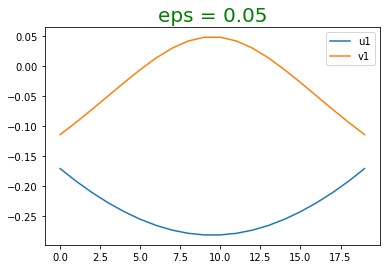

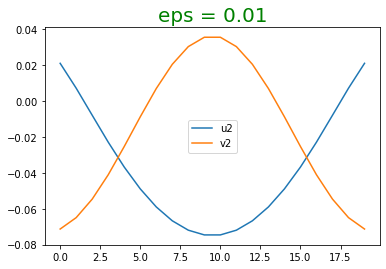

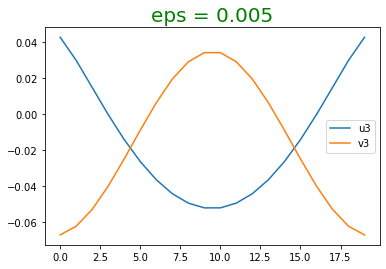

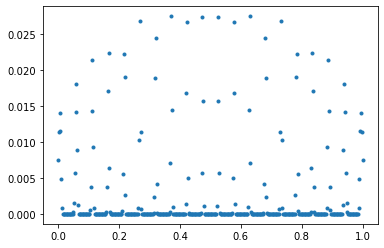

In [278]:
#Q3.6

N = 20
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
nu_1 = np.exp(-10*(y-0.5)**2)
nu = nu_1/sum(nu_1)
mu_1 = np.ones(N)
mu = mu_1/sum(mu_1)
c = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        c[i,j] = (x[i]-y[j])**2
u1,v1,gamma1 = Sinkhorn(mu,nu,c,0.05) #eps = 0.05
u2,v2,gamma2 = Sinkhorn(mu,nu,c,0.01) #eps = 0.01
u3,v3,gamma3 = Sinkhorn(mu,nu,c,0.005) #eps = 0.005
plt.plot(u1,label = 'u1'),plt.plot(v1,label = 'v1')
plt.title('eps = 0.05', size=20,color = 'g')
plt.legend()
plt.figure(2)
plt.plot(u2,label = 'u2'),plt.plot(v2,label = 'v2')
plt.title('eps = 0.01', size=20,color = 'g')
plt.legend()
plt.figure(3)
plt.plot(u3,label = 'u3'),plt.plot(v3,label = 'v3')
plt.title('eps = 0.005', size=20,color = 'g')
plt.legend()
gamma = np.hstack(np.vsplit(gamma3,20))
X = np.linspace(0,1,N**2)
plt.figure(4)
plt.plot(X,gamma[0,:],'.')

In [ ]:
###################  Option A  #####################

In [35]:
#QA.3

def Sinkhorn3(rho,E,eps):
    N = len(rho)
    a = np.zeros(N)
    b = np.ones(N)
    c = np.ones(N)
    gamma_til_12 = np.exp(-E/eps)
    gamma_til_23 = np.exp(-E/eps)
    gamma_til_13 = np.exp(-E/eps)
    gamma_bar = np.zeros((N,N,N))
    for i in range(N):
        for j in range(N):
            for k in range(N):
                gamma_bar[i,j,k] = gamma_til_12[i,j]+gamma_til_23[i,k]+gamma_til_13[j,k]
    it = 0     #nombre d'itération
    l = gamma_til_12@diag(b)@gamma_til_23@diag(c)@gamma_til_13
    m = gamma_til_12@diag(a)@gamma_til_23@diag(c)@gamma_til_13
    n = gamma_til_12@diag(a)@gamma_til_23@diag(b)@gamma_til_13
    while it < 10000:
        a2 = 1.*a    #stockage de a
        b2 = 1.*b    #stockage de b
        c2 = 1.*c    #stockage de c
        for i_1 in range(N):
            a[i_1] = rho[i_1]/l[i_1,i_1]
        for i_2 in range(N):
            b[i_2] = rho[i_2]/m[i_2,i_2]
        for i_3 in range(N):
            c[i_3] = rho[i_2]/m[i_3,i_3]
        if np.linalg.norm(a2-a)<10e-6 and np.linalg.norm(b2-b)<10e-6 and np.linalg.norm(b2-b)<10e-6:
            break
        it += 1
    u = np.log(a)*eps
    v = np.log(b)*eps
    w = np.log(c)*eps
    gamma = np.zeros((N,N,N))
    for i_1 in range(N):
        for i_2 in range(N):
            for i_3 in range(N):
                gamma[i_1,i_2,i_3] = a[i_i]*b[i_2]*c[i_3]*gamma_bar[i_1,i_2,i_3]
    return u,v,w,gamma

In [40]:
#QA.4
